In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from xgboost import XGBClassifier

from sklearn.metrics import f1_score, make_scorer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from operator import itemgetter
import xgboost as xgb
import random
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt

import lightgbm as lgb
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder

/home/bhavesh/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")

In [6]:
df_test["Freq_Of_Word_2"].unique().size

64

In [ ]:
unused=['Freq_Of_Word_1',
 'Freq_Of_Word_4',
 'Freq_Of_Word_15',
 'Freq_Of_Word_26',
 'Freq_Of_Word_30',
 'Freq_Of_Word_31',
 'Freq_Of_Word_35',
 'Freq_Of_Word_38',
 'Freq_Of_Word_39',
 'Freq_Of_Word_41',
 'Freq_Of_Word_43',
 'Freq_Of_Word_44',
 'Freq_Of_Word_47',
 'Freq_Of_Word_48',
 'Freq_Of_Word_32', 
 'Freq_Of_Word_40', 
 'Freq_Of_Word_34',
 "Freq_Of_Word_8",
 "Freq_Of_Word_3",
 "Freq_Of_Word_13",
 "Freq_Of_Word_33",
 "Freq_Of_Word_46",
 "Freq_Of_Word_29",
 "Freq_Of_Word_17",
 "Freq_Of_Word_22"]

In [ ]:
combined=pd.concat([df_train,df_test])
combined.drop(unused,axis=1,inplace=True)
#df_train=combined.iloc[:947,]

df_train.drop(unused,axis=1,inplace=True)
df_test.drop(unused,axis=1,inplace=True)

df_train.iloc[ :,:-1]=df_train.iloc[ :,:-1]+2
combined.iloc[:,:-1]=combined.iloc[:,:-1]+2
df_test=df_test+2

In [ ]:
df_test.shape

In [ ]:
for i in combined.iloc[:,:-1].columns:
    lis=df_train[i].unique().tolist()
    lis.insert(0,0) 
    lis.append(40)
    lis.sort()
    #print("yes")
    #print(lis)
    combined['binned_'+ i ] = pd.cut(combined[i], bins=lis,include_lowest=False, right=True)
    combined.drop(i,axis=1,inplace=True)

In [1444]:
combined["binned_Freq_Of_Word_2"].unique().size

97

In [1445]:
combined=combined.apply(LabelEncoder().fit_transform)

In [1419]:
df_train=combined.iloc[:947,]
df_test=combined.iloc[947:,]

In [1420]:
list1=df_train["binned_Freq_Of_Word_2"].unique().tolist()

In [1421]:
list2=df_test["binned_Freq_Of_Word_2"].unique().tolist()

In [1422]:
set(list2)-set(list1)

{96}

In [1423]:
df_test[df_test["binned_Freq_Of_Word_2"]==96]

,IsGoodNews,binned_Freq_Of_Word_2,binned_Freq_Of_Word_5,binned_Freq_Of_Word_6,binned_Freq_Of_Word_7,binned_Freq_Of_Word_9,binned_Freq_Of_Word_10,binned_Freq_Of_Word_11,binned_Freq_Of_Word_12,binned_Freq_Of_Word_14,...,binned_Freq_Of_Word_28,binned_Freq_Of_Word_36,binned_Freq_Of_Word_37,binned_Freq_Of_Word_42,binned_Freq_Of_Word_45,binned_Freq_Of_Word_49,binned_Freq_Of_Word_50,binned_TotalEmojiCharacters,binned_LengthOFFirstParagraph,binned_StylizedLetters
119,306,96,0,0,0,0,0,0,197,0,...,0,0,0,0,141,0,0,1,5,22


In [1424]:
flag=0
if(set(list2).issubset(set(list1))): 
    flag = 1
      

if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

No, list is not subset of other.


In [1425]:
combined["binned_Freq_Of_Word_2"].unique().size


97

In [1426]:

X_train, X_test, Y_train, Y_test = train_test_split(df_train.drop(labels=['IsGoodNews'], axis=1),df_train['IsGoodNews'],test_size=0.3,random_state=0)


In [1427]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC

In [1428]:
rf = XGBClassifier(n_estimators=125)
rf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [1429]:
predictions = rf.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))


F1 score 0.9315068493150684
Accuracy Score = 94.74


In [1431]:
predictions = rf.predict(X_test)
pd.DataFrame(Y_test,predictions)

,IsGoodNews
0,NaN
1,0.0
0,NaN
0,NaN
0,NaN
...,...
0,NaN
0,NaN
1,0.0
0,NaN


In [854]:
df_test["Freq_Of_Word_2"].sort_values().tail(10)

286     5.239333
7       5.579604
52      5.765205
364     5.765205
167     5.888940
44      6.724149
65      7.002551
176     7.126286
439     9.291641
119    14.550362
Name: Freq_Of_Word_2, dtype: float64

In [855]:
df_train["Freq_Of_Word_2"].sort_values().tail(20)

695     5.734272
567     5.888940
83      6.074542
327     6.229210
691     6.229210
220     6.322011
5       6.507613
67      6.662281
59      6.724149
30      6.724149
814     6.786016
522     7.188153
794     7.404689
103     7.652158
831     7.744959
229     8.239897
890     9.724712
587    12.075670
258    12.570608
193    13.065546
Name: Freq_Of_Word_2, dtype: float64

In [835]:
pd.DataFrame(df_test.groupby(["Freq_Of_Word_2"])["IsGoodNews"].count()).head(20)

,IsGoodNews
Freq_Of_Word_2,
1.681964,0
1.712898,0
1.743831,0
1.774765,0
1.836632,0
1.867566,0
1.929433,0
1.991300,0
2.022234,0


In [834]:
pd.DataFrame(df_train.groupby(["Freq_Of_Word_2"])["IsGoodNews"].value_counts()).head(20)

IsGoodNews
Freq_Of_Word_2 IsGoodNews            
1.681964       0.0                528
               1.0                224
1.712898       0.0                  1
1.774765       0.0                  1
1.805698       0.0                  1
               1.0                  1
1.836632       1.0                  3
1.867566       0.0                  1
               1.0                  1
1.898499       1.0                  1
1.929433       1.0                  4
               0.0                  1
1.960367       1.0                  2
               0.0                  1
1.991300       1.0                  4
2.053168       0.0                  1
2.084101       0.0                  2
               1.0                  2
2.115035       0.0                  4
               1.0                  1

In [793]:
# pd.DataFrame(df_test.groupby('Freq_Of_Word_19').count())

,Freq_Of_Word_2,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_14,Freq_Of_Word_16,...,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_42,Freq_Of_Word_45,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
Freq_Of_Word_19,,,,,,,,,,,,,,,,,,,,,
1.026839,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,0
1.043795,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1.066402,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1.094662,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1.100314,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.791038,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
5.209282,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5.486228,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [819]:
df_train['Freq_Of_Word_2'] = pd.qcut(df_train['Freq_Of_Word_2'], q=94)

ValueError: Bin edges must be unique: array([ 1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.68196389,  1.68196389,  1.68196389,  1.68196389,  1.68196389,
        1.80569848,  1.92943307,  2.08146866,  2.17690226,  2.20915223,
        2.30063685,  2.48623874,  2.57903969,  2.70277428,  2.80676399,
        2.95024347,  3.04304441,  3.19771265,  3.41424819,  3.7867683 ,
        4.10202825,  4.46006877,  5.54866993,  6.72414856, 13.06554646]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [795]:
df_train.describe()

,Freq_Of_Word_2,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_14,Freq_Of_Word_16,...,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_42,Freq_Of_Word_45,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,...,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,2.039056,1.981576,2.002831,1.993593,2.044759,2.005193,2.027260,1.981491,2.039708,1.983453,...,1.982669,1.994985,1.965525,2.059328,2.033669,2.013292,1.986721,1.978183,2.018881,0.388596
std,1.085628,0.890268,0.970823,0.868676,1.179691,1.129019,1.102226,0.958783,1.164453,0.813463,...,0.860243,0.961354,0.802059,1.169027,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,1.681964,1.534790,1.646023,1.695743,1.681203,1.647032,1.679409,1.364785,1.815621,1.666390,...,1.755081,1.670626,1.831002,1.676981,1.848089,1.546258,1.892617,1.780997,1.572318,0.000000
25%,1.681964,1.534790,1.646023,1.695743,1.681203,1.647032,1.679409,1.364785,1.815621,1.666390,...,1.755081,1.670626,1.831002,1.676981,1.848089,1.546258,1.892617,1.804524,1.625677,0.000000
50%,1.681964,1.534790,1.646023,1.695743,1.681203,1.647032,1.679409,1.518351,1.815621,1.666390,...,1.755081,1.670626,1.831002,1.676981,1.848089,1.769319,1.918828,1.835893,1.722565,0.000000
75%,1.681964,2.107252,1.646023,1.695743,1.681203,1.919807,1.679409,2.253271,1.815621,1.887178,...,1.755081,1.670626,1.831002,1.981978,1.848089,2.145162,1.945039,1.961368,1.960573,1.000000
max,13.065546,10.479498,13.570173,8.461416,20.826505,27.078049,11.323373,7.814534,17.514450,10.043349,...,12.375976,11.435541,14.663881,20.446001,17.146785,17.670854,30.750489,10.419193,14.437402,1.000000


In [796]:
df_test.describe()

,Freq_Of_Word_2,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_14,Freq_Of_Word_16,...,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_42,Freq_Of_Word_45,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,0.0
mean,1.984433,2.048186,2.004758,1.960933,1.976599,1.977659,2.008805,2.024900,1.959621,2.005274,...,1.992047,1.997535,2.116023,1.953940,1.985759,1.948106,2.029887,2.010378,1.984725,NaN
std,0.991826,1.224778,1.193867,1.003432,0.847441,0.766367,1.003261,1.068600,0.707351,0.993291,...,1.217465,1.060802,1.474285,0.927857,0.874084,0.771676,1.241018,0.632055,0.697853,NaN
min,1.681964,1.534790,1.646023,1.695743,1.681203,1.647032,1.679409,1.364785,1.815621,1.666390,...,1.755081,1.670626,1.831002,1.676981,1.848089,1.546258,1.892617,1.780997,1.572318,NaN
25%,1.681964,1.534790,1.646023,1.695743,1.681203,1.647032,1.679409,1.364785,1.815621,1.666390,...,1.755081,1.670626,1.831002,1.676981,1.848089,1.546258,1.892617,1.808445,1.631293,NaN
50%,1.681964,1.534790,1.646023,1.695743,1.681203,1.647032,1.679409,1.639009,1.815621,1.666390,...,1.755081,1.670626,1.831002,1.676981,1.848089,1.741818,1.918828,1.843735,1.725373,NaN
75%,1.681964,2.143030,1.646023,1.695743,1.681203,1.947784,1.679409,2.319085,1.815621,1.776784,...,1.755081,1.670626,1.831002,1.752057,1.848089,2.070299,1.945039,1.961368,2.004103,NaN
max,14.550362,15.846323,22.028000,14.122489,7.614063,7.242416,10.621994,11.971770,8.193271,9.783598,...,20.574132,13.033027,18.325468,15.078061,15.763001,14.596883,28.627430,9.783974,6.163982,NaN


## Hyperparameter

In [699]:
rf = XGBClassifier(n_estimators=125,max_depth=4,min_child_weight=4)
rf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [700]:
df_train=combined.iloc[:947,]
df_test=combined.iloc[947:,]

Y_train = df_train['IsGoodNews']
X_train = df_train.drop('IsGoodNews', axis=1)


In [701]:
params={'colsample_bytree': 0.4,
  'gamma': 0.03,
  'learning_rate': 0.3,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 130,
  'reg_alpha': 0,
  'subsample': 0.85}

In [702]:
rf = XGBClassifier() 
clf = GridSearchCV(rf,params,
                    cv=3,
                    verbose=1, 
                    scoring='accuracy',
                    n_jobs=4
                  )

clf.fit(X_train,Y_train)
clf.best_score_, clf.best_params_

ValueError: Parameter values for parameter (colsample_bytree) need to be a sequence(but not a string) or np.ndarray.

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [587]:
predictions = rf.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))


F1 score 0.9308755760368664
Accuracy Score = 94.74


In [ ]:
import lightgbm as lgb


In [3]:
from catboost import CatBoostRegressor

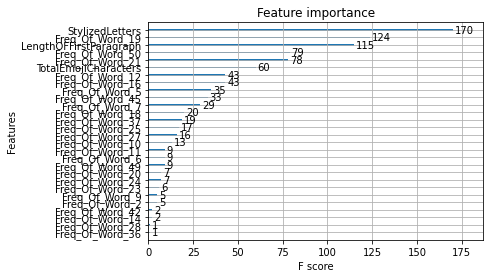

In [401]:
from xgboost import plot_importance
plot_importance(rf)

In [355]:
# from numpy import loadtxt
# from keras.models import Sequential
# from keras.layers import Dense

# model = Sequential()
# model.add(Dense(8, input_dim=28, activation='relu'))
# #model.add(Dense(12, activation='relu'))
# #model.add(Dense(8, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))
# # compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset
# model.fit(X_train,Y_train, epochs=400, batch_size=32, verbose=0)
# # make class predictions with the model
# _, accuracy = model.evaluate(X_train,Y_train)
# print('Accuracy: %.2f' % (accuracy*100))

# predictions = model.predict_classes(X_test)
# print("F1 score " + f1_score(Y_test, predictions).astype(str))


# # summarize the first 5 cases
# # for i in range(5):
# #     print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

662/662 [==============================] - 0s 519us/step
Accuracy: 97.43
F1 score 0.8609865470852017


In [237]:
df_test.describe()

,Freq_Of_Word_2,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_14,Freq_Of_Word_16,...,Freq_Of_Word_36,Freq_Of_Word_37,Freq_Of_Word_42,Freq_Of_Word_45,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,0.0
mean,-0.015567,0.048186,0.004758,-0.039067,-0.023401,-0.022341,0.008805,0.024900,-0.040379,0.005274,...,-0.007953,-0.002465,0.116023,-0.046060,-0.014241,-0.051894,0.029887,0.010378,-0.015275,NaN
std,0.991826,1.224778,1.193867,1.003432,0.847441,0.766367,1.003261,1.068600,0.707351,0.993291,...,1.217465,1.060802,1.474285,0.927857,0.874084,0.771676,1.241018,0.632055,0.697853,NaN
min,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.635215,-0.184379,-0.333610,...,-0.244919,-0.329374,-0.168998,-0.323019,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,NaN
25%,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.635215,-0.184379,-0.333610,...,-0.244919,-0.329374,-0.168998,-0.323019,-0.151911,-0.453742,-0.107383,-0.191555,-0.368707,NaN
50%,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.360991,-0.184379,-0.333610,...,-0.244919,-0.329374,-0.168998,-0.323019,-0.151911,-0.258182,-0.081172,-0.156265,-0.274627,NaN
75%,-0.318036,0.143030,-0.353977,-0.304257,-0.318797,-0.052216,-0.320591,0.319085,-0.184379,-0.223216,...,-0.244919,-0.329374,-0.168998,-0.247943,-0.151911,0.070299,-0.054961,-0.038632,0.004103,NaN
max,12.550362,13.846323,20.028000,12.122489,5.614063,5.242416,8.621994,9.971770,6.193271,7.783598,...,18.574132,11.033027,16.325468,13.078061,13.763001,12.596883,26.627430,7.783974,4.163982,NaN


In [879]:
params={'colsample_bytree': 0.4,
  'gamma': 0.03,
  'learning_rate': 0.3,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 130,
  'reg_alpha': 0,
  'subsample': 0.85,
    'n_estimators': 130
       }

In [1376]:
df_train=combined.iloc[:947,]
df_test=combined.iloc[947:,]

Y_train = df_train['IsGoodNews']
X_train = df_train.drop('IsGoodNews', axis=1)

rf = XGBClassifier(params=params)

In [1377]:
rf.fit(X_train,Y_train)

pred = rf.predict(df_test.drop(["IsGoodNews"],axis=1))
submission=pd.DataFrame(pred,columns=["IsGoodNews"])
submission.IsGoodNews=submission.IsGoodNews.astype(int)
submission.to_excel("submission.xlsx")